In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
birthDF = pd.read_csv('C:/pandasTest/data/births.csv', index_col='year')
# birthDF.columns = birthDF.columns.str.strip()
# birthDF
birthDF

,boys,girls
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [3]:
birthDF.columns

Index([' boys', ' girls'], dtype='object')

```text
1. 남아 ,여아 출생 평균을 구하시요

In [4]:
birthDF.mean().round()

boys     1225776.0
girls    1245399.0
dtype: float64

```text
2. 남아 수가 평균보다 많은 연도만 출력하시오

In [ ]:
m = birthDF[' boys'].mean()
birthDF.query('` boys`>@m').index #한글이나 공백이 있는 컬럼은 `` 주기

Index([1921, 1924, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

In [5]:
birthDF[birthDF[' boys']> birthDF[' boys'].mean()].index

Index([1921, 1924, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

```text
3. 남아출생이 가장많은 top5를 구하시요(년도와 남아수)

In [6]:
birthDF.nlargest(5,' boys', keep='all')

,boys,girls
year,,
1957,2044160,2155866
1959,2023044,2133509
1960,2022093,2132717
1961,2017316,2122502
1958,2010884,2120712


In [7]:
birthDF[' boys'].nlargest(5, keep='all')

year
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name:  boys, dtype: int64

```text
4. 남아율(%) 을 구하고 각년도별 남아수가 차지하는 비율컬럼을 추가하시요

In [8]:
birthDF['남아율(%)'] = (birthDF[' boys']/(birthDF[' boys']+birthDF[' girls']))*100

In [16]:
birthDF

,boys,girls,남아율(%)
year,,,
1880,90993,110491,45.161402
1881,91954,100745,47.718981
1882,107850,113688,48.682393
1883,112321,104629,51.772759
1884,129022,114445,52.993630
...,...,...,...
2007,1919408,2072139,48.086819
2008,1887234,2036289,48.100495
2009,1832925,1979303,48.080152


```text
 5. 2000년도 이후데이터 에 대해 출생량 을 구하고
남아수가 1800000 이상이면 '많음'아니면 '적음' 이라고 보여 주시요( 결과는 데이터프레임)
년도 	남아수 출생량
----------------------
2000   1233   '많음'
2001   1234   '적음'

In [10]:
y2000 = birthDF.loc[2000:, ' boys']
birth_many = birthDF.loc[2000:].apply(lambda v: '많음' if v.loc[' boys']>1800000 else '적음', axis=1)

boy_dict = {'남아수': y2000, '출생량':birth_many}
pd.DataFrame(boy_dict)

,남아수,출생량
year,,
2000,1814601,많음
2001,1799049,적음
2002,1795206,적음
2003,1825359,많음
2004,1834145,많음
2005,1845379,많음
2006,1898463,많음
2007,1919408,많음
2008,1887234,많음


```text
6.1800년대,1900년대,2000년대 각 남아수,여아수 평균을 구하시요

In [11]:
y1800 = birthDF.loc[1800:1899].mean()
y1900 = birthDF.loc[1900:1999].mean()
y2000 = birthDF.loc[2000:].mean()

ym = pd.DataFrame([y1800,y1900,y2000],
                  index=['1800년대', '1900년대', '2000년대'])
ym.round(2)

,boys,girls,남아율(%)
1800년대,176714.15,111820.55,59.92
1900년대,1362901.51,1384145.55,51.85
2000년대,1831500.58,1978477.50,48.07


```text
7. 6번의 1800년대,1900년대,2000년대를 x축으로 남아수 , 여아수 평균을 y축으로 라인차트를 그리시요

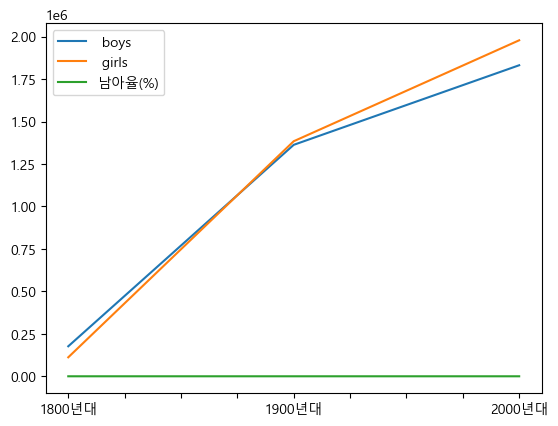

In [12]:
ym.plot()
plt.show()

```text
8. 연도별로 누가 더 많이 태어났는지(남아 vs 여아) 비교하시오
각 행에서 남아 > 여아 이면 'Boy', 아니면 'Girl'을 출력.
출력결과( 결과는 데이터프레임)

년도 결과
----------------
1800 boy
1801 boy
...
2100 girl

In [19]:
b_g = birthDF.apply(lambda v: 'Boy' if v[' boys']>v[' girls'] else 'Girl', axis=1)

pd.DataFrame(b_g, columns=['결과'])

,결과
year,
1880,Girl
1881,Girl
1882,Girl
1883,Boy
1884,Boy
...,...
2007,Girl
2008,Girl
2009,Girl


```text
9. 총 출생아 수 기준 가장 많은 해 년도를 구하시요

In [17]:
birthDF.drop(columns=['남아율(%)'], inplace=True)

In [20]:
birthDF[birthDF.sum(axis=1)==birthDF.sum(axis=1).max()].index.to_list()

[1957]

```text
10. 여아 수가 남아 수보다 많은 연도만 추출하시오

In [21]:
birthDF[birthDF[' boys']>birthDF[' girls']].index.to_list()

[1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936]

```text
11. 남아 증가량(전년 대비 변화율)을 계산하시오

In [23]:
birthDF[' boys'].pct_change()

year
1880         NaN
1881    0.010561
1882    0.172869
1883    0.041456
1884    0.148690
          ...   
2007    0.011033
2008   -0.016762
2009   -0.028777
2010   -0.032837
2011   -0.010852
Name:  boys, Length: 132, dtype: float64

```text
12. 2000대이후 남아 여아 바차트를 그리시요 ( df.plot(kind='bar') 이용)

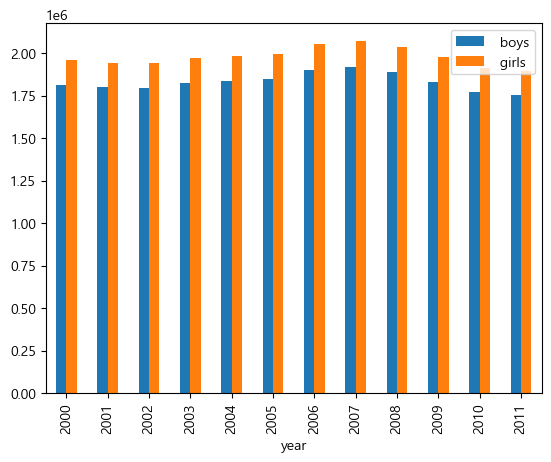

In [22]:
birthDF.loc[2000:].plot(kind='bar')
plt.show()